<h3>AI/ML Course - Week 1</h3>

<p>Mariano Salcedo - mariano.salcedo@nokia.com</p>


In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.patches as mpl_patches
import seaborn as sns

In [2]:
path =r'C:\python_sqm\data\raw\AI-ML_Nokia'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, delimiter=","))

# Concatenate all data into one DataFrame
iris = pd.concat(dfs, ignore_index=True)


In [3]:
iris.head(3)

id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa

In [4]:
# Let's check if there's any missing value
iris.isnull().values.any()

False

Therefore no Null values are present on the dataframe </p>

Let's check the data types for each varible

In [5]:
iris.dtypes

id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
# So data types seems as expected. Let's create a new dataframe without id field, as it does not provide 
# any information for exploratory analysis
iris_df=iris.drop(columns=['id'])
iris_df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [7]:
# Let's see a statisctical description for every variable
iris_df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

The previous table showed a description of every variable, but it doesn't differentiate to which specie they belong.</p>
</p>
Let's get the Mean and StdDev for every specie-variable pair: </p>
</p>

In [8]:
iris_df.groupby(['Species'])[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].agg([np.mean, np.std]).round(2)

SepalLengthCm       SepalWidthCm       PetalLengthCm        \
                         mean   std         mean   std          mean   std   
Species                                                                      
Iris-setosa              5.01  0.35         3.42  0.38          1.46  0.17   
Iris-versicolor          5.94  0.52         2.77  0.31          4.26  0.47   
Iris-virginica           6.59  0.64         2.97  0.32          5.55  0.55   

                PetalWidthCm        
                        mean   std  
Species                             
Iris-setosa             0.24  0.11  
Iris-versicolor         1.33  0.20  
Iris-virginica          2.03  0.27

<h4> Error bars </h4>
Now let's create a plot that connects the mean values for each specie across the 4 variables and the respective confidence </br>
interval around them. I'll use 2 Standard Deviation as the error, so the resultant plot will be 3 bands in which samples</br>
will be contained with a confidence level of 95%. </p>
(*) Note that for this statement to be correct, the distribution of each variable must be normal. In order to verify this,</br>
a normality test should be performed. The following function from Scipy library can be used to test that the null hypothesis </br>
that a sample comes from a normal distribution: </p>
</p>

In [9]:
from scipy import stats
k2, p = stats.normaltest(iris_df.loc[iris_df['Species']=="Iris-setosa",
                                     ['SepalLengthCm']].reset_index(drop=True))
p

array([0.90748183])

Distributions with p-values greater than 0.05 indicates that we can't reject the null hypothesis, where: </p>
* H₀: Data follow a normal distribution </br>
* H₁: Data do not follow a normal distribution </p>

Therefore we conclude that data follows a normal distribution.

In [10]:
df0=iris_df.groupby(['Species'])[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].mean().round(2).reset_index()
df1=iris_df.groupby(['Species'])[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].std().round(2).reset_index()

df0_t=df0.T.reset_index()
df1_t=df1.T.reset_index()

#df0_t.iloc[1:5,3]
#df1_t.iloc[1:5,1]

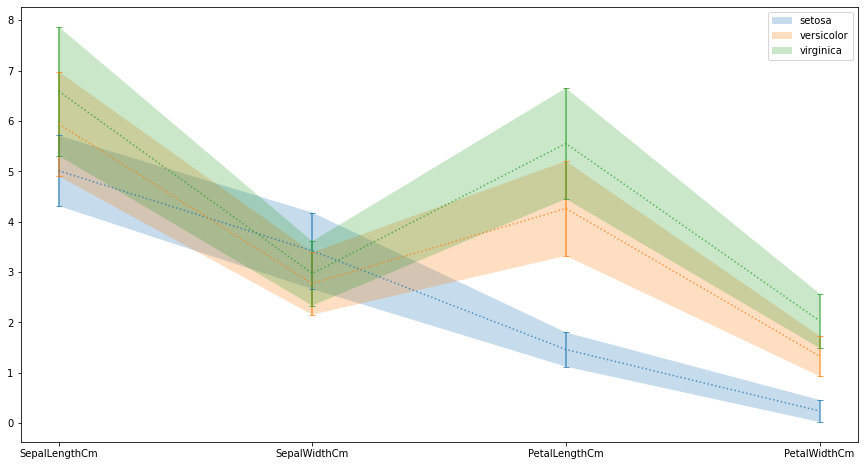

In [11]:
import matplotlib.pyplot as plt

# create sample data
data_1 = {
    'x': ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    'y': df0_t.iloc[1:5,1],
    'yerr': 2*df1_t.iloc[1:5,1]}
data_2 = {
    'x': ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    'y': df0_t.iloc[1:5,2],
    'yerr': 2*df1_t.iloc[1:5,2]}
data_3 = {
    'x': ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    'y': df0_t.iloc[1:5,3],
    'yerr': 2*df1_t.iloc[1:5,3]}


# plot
plt.figure(figsize=(15,8))

for data in [data_1, data_2, data_3]:
    plt.errorbar(**data, alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['x'],
        'y1': [y - e for y, e in zip(data['y'], data['yerr'])],
        'y2': [y + e for y, e in zip(data['y'], data['yerr'])]}
    plt.fill_between(**data, alpha=.25)
plt.title("")
plt.legend(["setosa", "versicolor", "virginica"])

<h4> Pairplot </h4>
In pairplot, a scatter plot between every pair of variables is represented, letting us understand how both variables are corraleted </br>
for each specie. </br>
Diagonal plots are the marginal distribution of the data in each column for each specie.

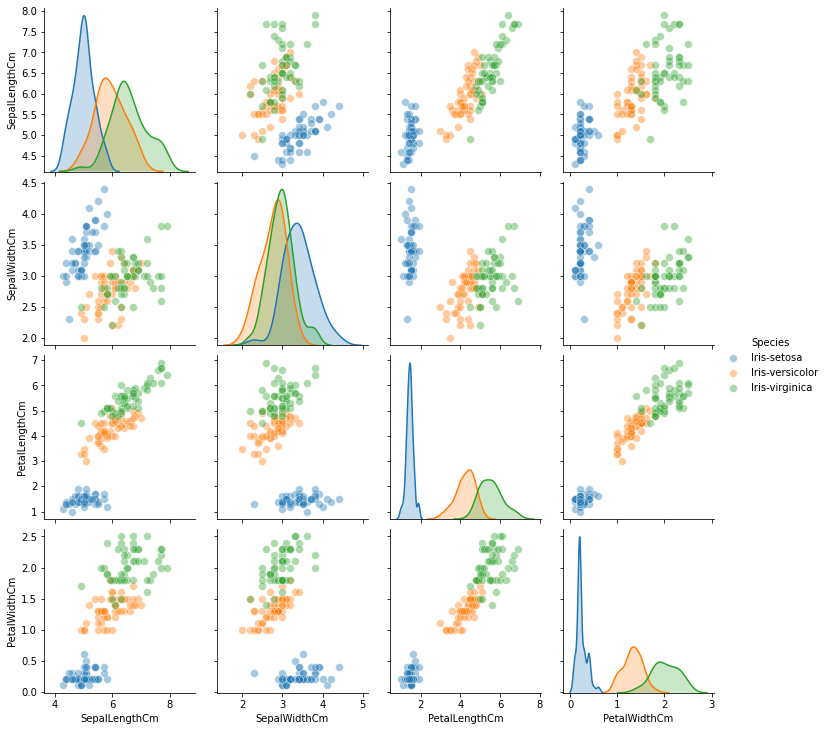

In [12]:
sns.pairplot(iris_df, hue = 'Species', kind='scatter',
            plot_kws = {'alpha': 0.4, 's': 60, 'edgecolor': 'w'});

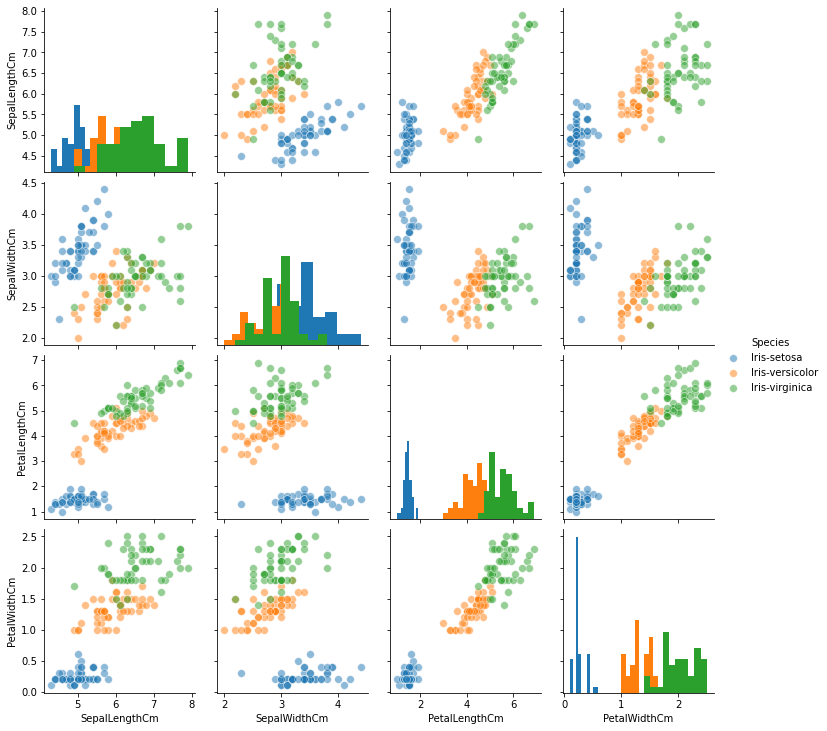

In [13]:
# Same as previous plot but using histograms in diagonal

sns.pairplot(iris_df, hue = 'Species', diag_kind='hist',
            plot_kws = {'alpha': 0.5, 's': 60, 'edgecolor': 'w'});

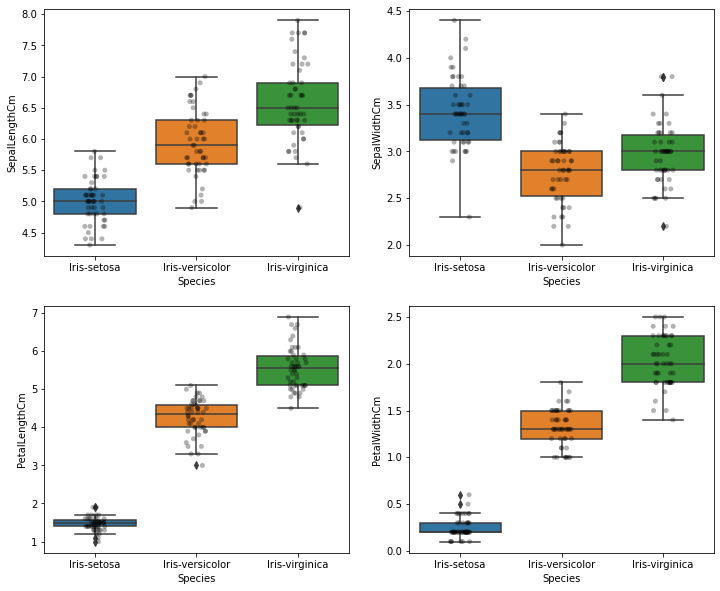

In [14]:
# Now let's use boxplots to better understand how these 4 variables vary for each species

plt.figure(figsize=(12,10))   

plt.subplot(2,2,1)    
sns.boxplot(x='Species', y='SepalLengthCm', data=iris_df)
sns.stripplot(x='Species', y='SepalLengthCm', color='black', alpha=0.3, data=iris_df)

plt.subplot(2,2,2)    
sns.boxplot(x='Species',y='SepalWidthCm',data=iris_df)  
sns.stripplot(x='Species', y='SepalWidthCm', color='black', alpha=0.3, data=iris_df)

plt.subplot(2,2,3)    
sns.boxplot(x='Species',y='PetalLengthCm',data=iris_df)   
sns.stripplot(x='Species', y='PetalLengthCm', color='black', alpha=0.3, data=iris_df)

plt.subplot(2,2,4)    
sns.boxplot(x='Species',y='PetalWidthCm',data=iris_df)
sns.stripplot(x='Species', y='PetalWidthCm', color='black', alpha=0.3, data=iris_df)


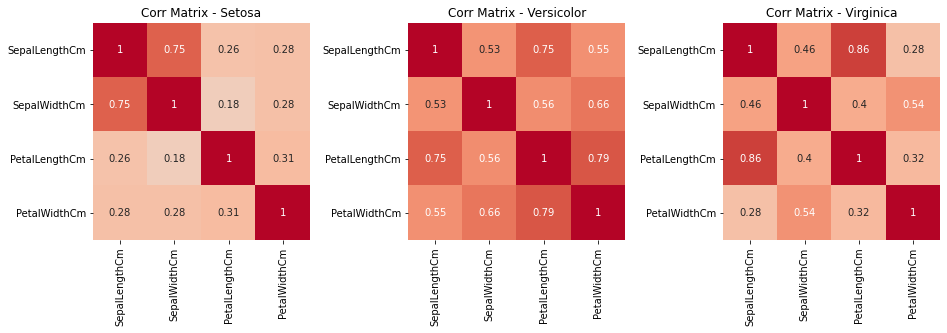

In [15]:
# Let's split the main df into 3, grouped by specie and plot the correlation between variables

setosa=iris_df.loc[iris_df['Species']=="Iris-setosa",['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].reset_index(drop=True)
versicolor=iris_df.loc[iris_df['Species']=="Iris-versicolor", ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].reset_index(drop=True)
virginica=iris_df.loc[iris_df['Species']=="Iris-virginica", ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].reset_index(drop=True)

plt.figure(figsize=(16,4))   
plt.subplot(1,3,1)
plt.title('Corr Matrix - Setosa')
sns.heatmap(setosa.corr(), vmin=-1, cmap='coolwarm', annot=True, cbar=False, square=True);

plt.subplot(1,3,2)
plt.title('Corr Matrix - Versicolor')
sns.heatmap(versicolor.corr(), vmin=-1, cmap='coolwarm', annot=True, cbar=False, square=True);

plt.subplot(1,3,3)   
plt.title('Corr Matrix - Virginica')
sns.heatmap(virginica.corr(), vmin=-1, cmap='coolwarm', annot=True, cbar=False, square=True);




<h4>Parallel Coordinates with Plotly library </h4>

This plot represents each line of the dataframe, grouped by flower specie. Note that this librery creates interactive </br>
plots, where depending on how it was created it can be possible to zoom, move access, etc.

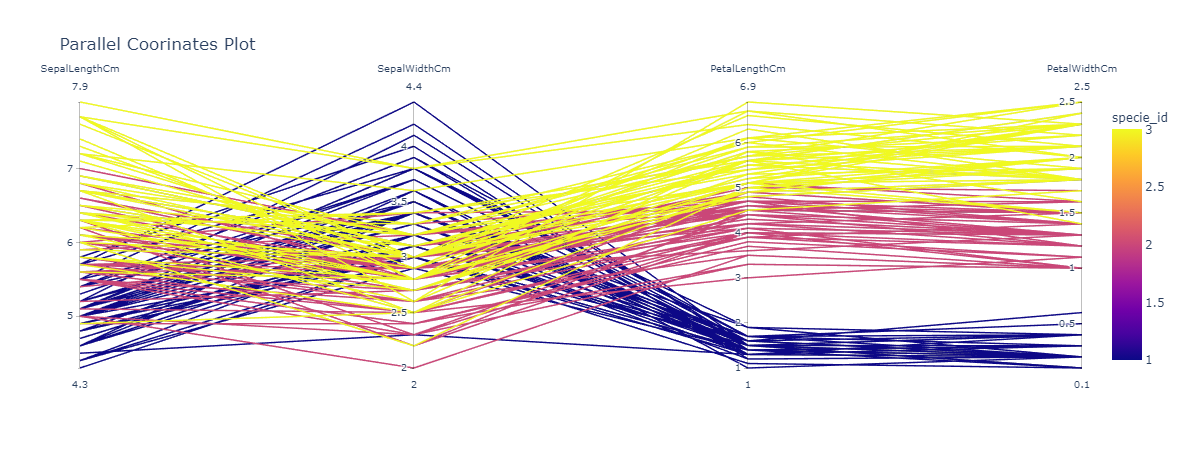

In [16]:
import plotly.express as px
import plotly.graph_objects as go


cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

iris_df['specie_id'] = np.where(iris_df['Species']=="Iris-setosa",1,
                                                np.where(iris_df['Species']=="Iris-versicolor",2,3))

fig = px.parallel_coordinates(iris_df, color='specie_id', dimensions=cols,
                             title="Parallel Coorinates Plot")

fig.show()
